In [37]:
import pandas as pd

In [38]:
food_trucks=pd.read_csv("/content/food_trucks.csv")

In [39]:
food_trucks.head()

,vendorID,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,1,12.40,3.0,163,6.83,2,0.12,30.0
1,2,12.10,1.8,140,3.62,5,269.24,40.5
2,3,13.52,6.0,139,3.86,5,8.17,35.7
3,4,15.56,4.0,124,4.05,3,99.09,32.8
4,5,15.08,8.5,186,6.51,5,33.42,35.6


In [40]:
food_trucks.drop('vendorID',axis=1,inplace=True)
food_trucks

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,12.40,3.0,163,6.83,2,0.12,30.0
1,12.10,1.8,140,3.62,5,269.24,40.5
2,13.52,6.0,139,3.86,5,8.17,35.7
3,15.56,4.0,124,4.05,3,99.09,32.8
4,15.08,8.5,186,6.51,5,33.42,35.6
...,...,...,...,...,...,...,...
243,14.70,2.5,153,10.13,3,127.16,40.2
244,14.75,1.1,170,7.88,4,36.29,41.6
245,15.89,0.7,162,3.22,4,44.35,37.8
246,16.17,1.2,153,4.62,4,91.98,41.1


In [41]:
food_trucks.describe()

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,14.334274,3.622581,148.822581,5.008468,3.044355,52.435484,40.824194
std,1.412888,3.779335,18.942080,1.683380,1.719750,52.002194,5.775277
min,8.810000,0.000000,88.000000,-0.270000,0.000000,0.120000,25.400000
25%,13.360000,1.175000,136.750000,3.780000,2.000000,16.305000,37.200000
50%,14.395000,2.600000,149.000000,5.090000,3.000000,38.315000,40.700000
75%,15.242500,4.500000,162.000000,6.105000,4.000000,68.637500,44.200000
max,18.320000,27.300000,202.000000,10.130000,9.000000,271.730000,58.600000


The describe() function in Python is a useful method for generating descriptive statistics of a dataset. It computes the count, mean, standard deviation, minimum, maximum, and quartiles of a dataset's numeric columns.This information is valuable for any analyst who will use the dataset to build a model because it provides insight into the data's overall shape and characteristics. This understanding helps in selecting appropriate preprocessing steps and data cleaning methods that can improve the quality of the data and make the model more accurate.

In [42]:
food_trucks.isnull()

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
243,False,False,False,False,False,False,False
244,False,False,False,False,False,False,False
245,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False


In [43]:
food_trucks.isnull().values.sum()

0

In [44]:
new_food_trucks = food_trucks[(food_trucks.avg_cost_item >0)]
new_food_trucks.describe()

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,14.346235,3.612146,148.862348,5.029838,3.048583,52.636154,40.818623
std,1.403120,3.783427,18.970165,1.652745,1.721949,52.011478,5.786336
min,8.810000,0.000000,88.000000,0.670000,0.000000,0.120000,25.400000
25%,13.375000,1.150000,136.500000,3.785000,2.000000,17.065000,37.200000
50%,14.400000,2.600000,149.000000,5.090000,3.000000,38.940000,40.700000
75%,15.245000,4.500000,162.000000,6.120000,4.000000,68.655000,44.200000
max,18.320000,27.300000,202.000000,10.130000,9.000000,271.730000,58.600000


There is a impossible value in food_trucks dataset that I have seen when I used describe function and found that min of avg cost item is negative which is wrong. So I removed the impossible value by using above code.

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(new_food_trucks)
data_normalized=scaler.transform(new_food_trucks)
data_normalized=pd.DataFrame(data=data_normalized,index=new_food_trucks.index,columns=new_food_trucks.columns)
print(data_normalized.describe().round(2))

       avg_transaction_cost  mnths_operational  days_yr  avg_cost_item  \
count                247.00             247.00   247.00         247.00   
mean                  -0.00              -0.00    -0.00           0.00   
std                    1.00               1.00     1.00           1.00   
min                   -3.95              -0.96    -3.21          -2.64   
25%                   -0.69              -0.65    -0.65          -0.75   
50%                    0.04              -0.27     0.01           0.04   
75%                    0.64               0.24     0.69           0.66   
max                    2.84               6.27     2.81           3.09   

       number_trucks  dist_lobland  bev_percent  
count         247.00        247.00       247.00  
mean           -0.00          0.00        -0.00  
std             1.00          1.00         1.00  
min            -1.77         -1.01        -2.67  
25%            -0.61         -0.69        -0.63  
50%            -0.03         -0.2

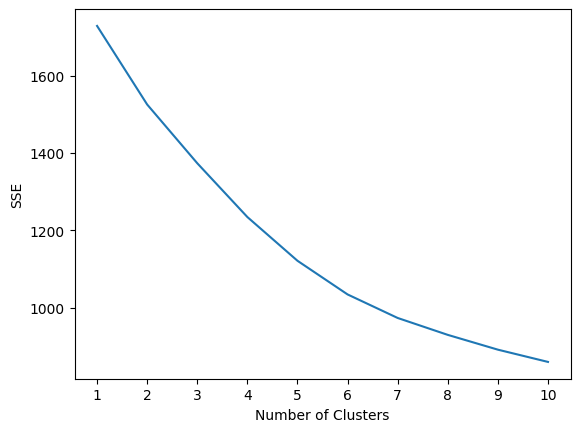

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_normalized)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [47]:
kmeans = KMeans(init="random", n_clusters=6, n_init=10, random_state=1)
kmeans.fit(data_normalized)
kmeans.labels_

array([2, 0, 1, 1, 4, 0, 2, 3, 4, 2, 1, 3, 2, 2, 3, 1, 3, 0, 4, 1, 1, 3,
       0, 4, 5, 5, 3, 0, 1, 1, 5, 1, 1, 1, 2, 4, 5, 2, 3, 2, 2, 1, 0, 5,
       0, 0, 2, 4, 1, 2, 5, 2, 2, 4, 1, 2, 2, 1, 3, 5, 3, 5, 2, 3, 0, 0,
       3, 1, 3, 5, 0, 4, 2, 5, 3, 5, 2, 2, 5, 1, 5, 1, 0, 4, 4, 3, 2, 0,
       3, 3, 2, 1, 5, 4, 2, 1, 3, 1, 2, 5, 1, 1, 4, 4, 3, 3, 5, 3, 2, 1,
       3, 1, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 4, 0, 3, 1, 2, 3, 3, 3, 3, 5,
       3, 4, 3, 2, 5, 1, 4, 3, 3, 1, 0, 4, 1, 4, 1, 3, 1, 2, 3, 2, 5, 3,
       3, 1, 3, 2, 5, 1, 4, 2, 2, 5, 5, 5, 2, 3, 5, 2, 4, 3, 4, 1, 1, 0,
       5, 5, 1, 1, 5, 2, 3, 1, 1, 3, 0, 5, 3, 1, 5, 3, 3, 2, 0, 1, 5, 1,
       5, 2, 3, 3, 2, 1, 1, 2, 4, 0, 2, 2, 0, 3, 3, 1, 5, 1, 3, 5, 5, 1,
       3, 5, 5, 1, 0, 4, 3, 5, 5, 3, 1, 5, 3, 4, 3, 3, 4, 5, 0, 5, 1, 5,
       2, 2, 1, 1, 1], dtype=int32)

In [48]:
#obtain cluster labels for each observation
new_food_trucks['cluster'] = kmeans.labels_

# group dataset by cluster labels and compute summary statistics for each cluster
cluster_stats = new_food_trucks.groupby(kmeans.labels_).describe()

for i in new_food_trucks.columns[0:-1]:
  print(i)
  print(cluster_stats[i])

<ipython-input-48-f295e1965d4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_food_trucks['cluster'] = kmeans.labels_


avg_transaction_cost
   count       mean       std    min      25%     50%      75%    max
0   22.0  14.160000  1.669106  10.84  12.9100  14.270  15.2025  16.85
1   56.0  14.842857  1.315612  12.45  13.9125  14.885  15.5000  18.32
2   48.0  13.864583  1.204122  11.06  13.2800  14.045  14.7125  16.29
3   54.0  15.030185  1.091616  12.65  14.1800  15.110  15.6725  17.66
4   25.0  14.389200  1.234095  11.72  13.6600  14.370  14.7300  17.86
5   42.0  13.427143  1.363837   8.81  12.8275  13.465  14.3600  15.34
mnths_operational
   count       mean       std  min    25%    50%     75%   max
0   22.0   2.650000  2.277791  0.2  1.225   2.35   3.275  10.9
1   56.0   2.728571  2.283276  0.0  0.925   2.50   3.850   9.7
2   48.0   2.304167  1.954913  0.0  0.675   1.60   3.625   8.3
3   54.0   2.675926  1.877869  0.0  0.975   2.65   3.700   8.0
4   25.0  12.344000  4.051551  7.3  9.900  12.10  13.800  27.3
5   42.0   2.795238  2.406592  0.1  1.050   2.15   3.575  10.0
days_yr
   count        mean  

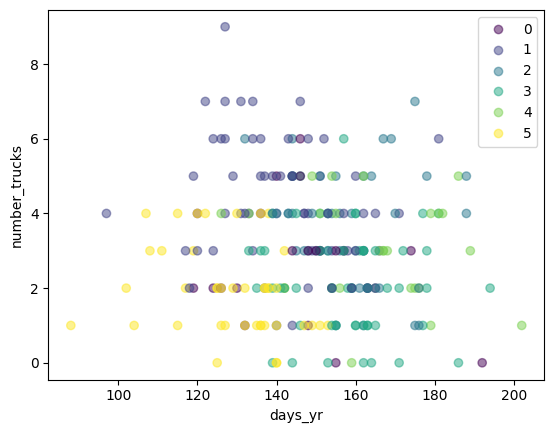

In [49]:
# Import pyplot
import matplotlib.pyplot as plt
cls = [0,1,2,3,4,5]
# Assign the columns of new_points: xs and ys
xs = new_food_trucks["days_yr"]
ys = new_food_trucks["number_trucks"]
# Make a scatter plot of xs and ys, using labels to define the colors
scatter = plt.scatter(xs,ys,c=kmeans.labels_,alpha=0.5)
plt.xlabel("days_yr")
plt.ylabel("number_trucks")
plt.legend(handles=scatter.legend_elements()[0], labels=cls);

From the above scatterplot it is found that vendors who belongs to cluster 5 are planning to operate maximum of 4 trucks for 150 days a year. Moreover vendors who are there in the cluster 1 are planning to operate maximum number of trucks from 100 to180 days.

<ipython-input-53-06c00eab2065>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y='number_trucks', ci=None, data=new_food_trucks, palette=colors)
<ipython-input-53-06c00eab2065>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='number_trucks', ci=None, data=new_food_trucks, palette=colors)
<ipython-input-53-06c00eab2065>:5: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(x='cluster', y='number_trucks', ci=None, data=new_food_trucks, palette=colors)


<Axes: xlabel='cluster', ylabel='number_trucks'>

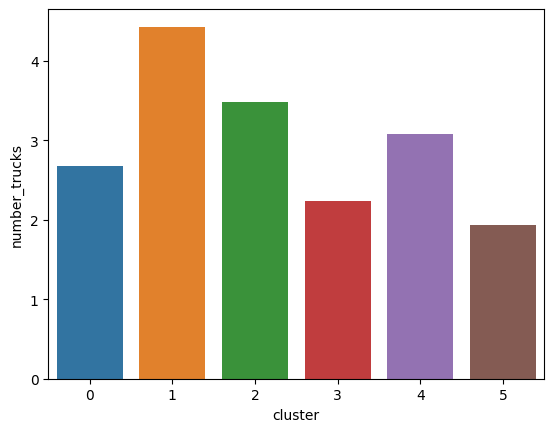

In [53]:
import seaborn as sns
# Define a color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
# Plot with the specified color palette
sns.barplot(x='cluster', y='number_trucks', ci=None, data=new_food_trucks, palette=colors)


The above bar plot predicts that vendors who are part of cluster-1 has maximum number of trucks and the vendors who are part of cluster 5 has minimum number of trucks.

<ipython-input-50-35fe4e59c6b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_food_trucks['cluster']=new_food_trucks['cluster'].astype('category')


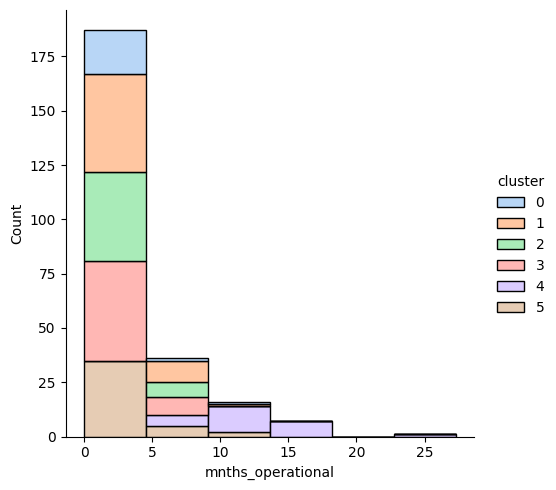

In [50]:
new_food_trucks['cluster']=new_food_trucks['cluster'].astype('category')
sns.displot(x="mnths_operational",hue="cluster",bins=6,palette='pastel',multiple='stack',data=new_food_trucks)

Above plotted displot indicates that vendors who belongs to cluster 4 operates trucks for maximum number of months as there cluster is clearly visible in 5-20 months. On the other side large number of vendors operate a truck for just 0 to 10 months.

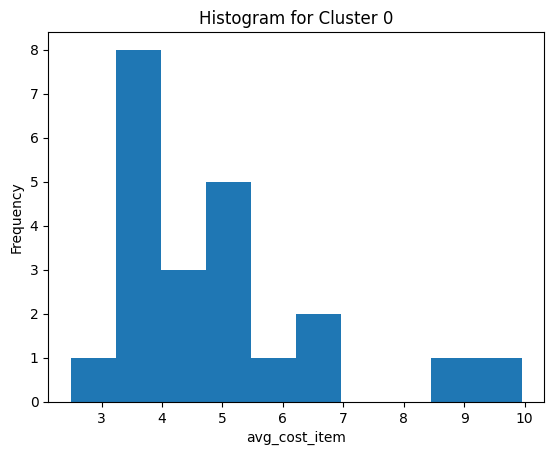

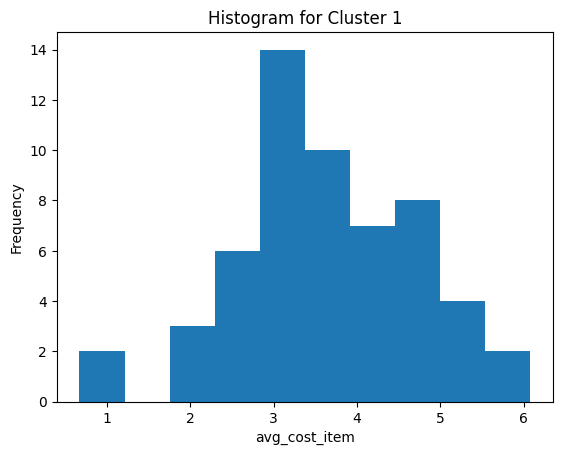

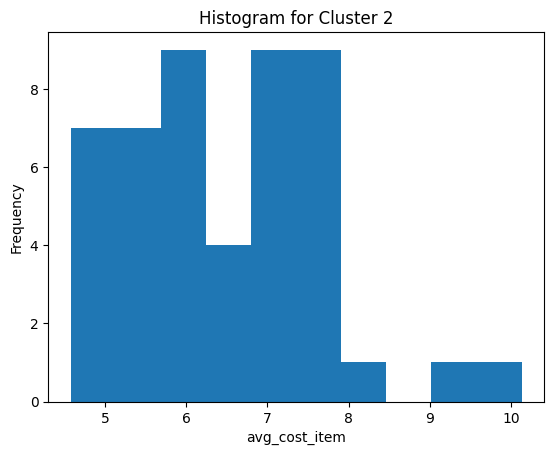

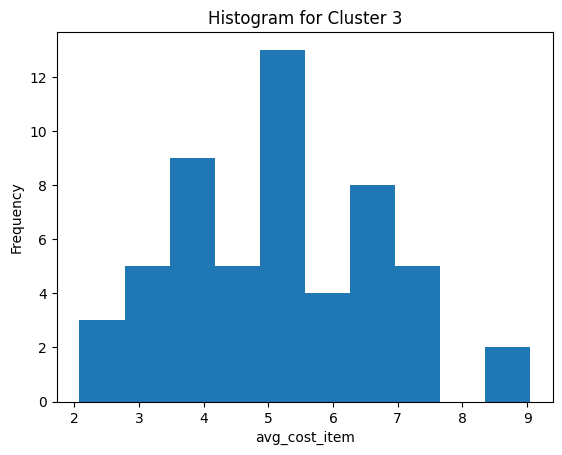

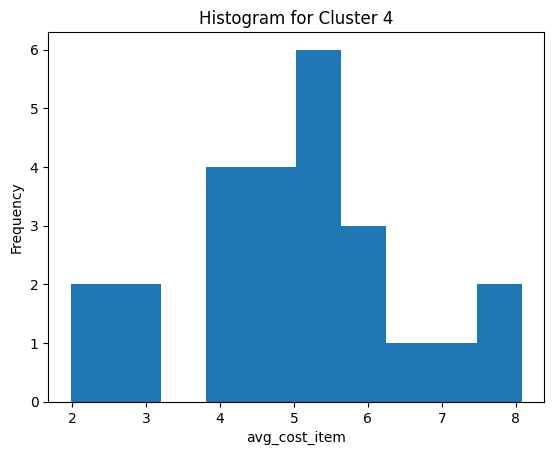

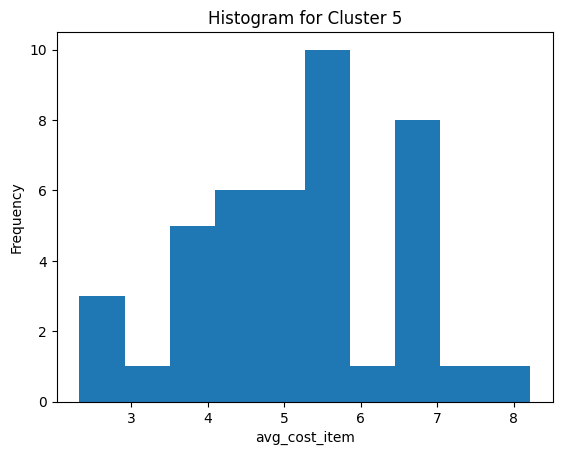

In [51]:
for i in range(0, 6):
  temp_df = (new_food_trucks[new_food_trucks["cluster"] == i])
  plt.hist(temp_df['avg_cost_item'], bins=10)
  plt.title('Histogram for Cluster {}'.format(i))
  plt.xlabel('avg_cost_item')
  plt.ylabel('Frequency')
  plt.show()

From above histograms it is found that the vendors who belong to cluster 0 have average customer expenditure on per food item is very high in the range of 3-4 which is same for cluster1. On the other hand for cluster 2 average customer expenditure on per food item is top most in the range of 6-8. For clusters 3,4 and 5 the expenditure on per food item is peak in the range of 5 to 6.